2

0      Tayeballya is leaving!
1                  I knew it!
2                  Oh my God!
3       Are you not thinking?
4                  Is it big?
               ...           
95         On your left side.
96       This is my daughter.
97              Yes, exactly.
98            Two stamps, no!
99    A little absent-minded.
Name: transl, Length: 100, dtype: object


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, 'Tayeballya is leaving!', "I think I'm going to leave!", 0.8434410095214844, True), (3, 'I knew it!', 'I knew it!', 1.0, True), (4, 'Oh my God!', 'oh god!', 0.9799060821533203, True), (5, 'Are you not thinking?', "Don't you think?", 0.7097709774971008, True), (6, 'Is it big?', 'is it big?', 1.0, True), (7, 'Just like you suggested.', 'As you suggested', 0.9655841588973999, True), (8, 'Just like she says.', 'as you say', 0.8879362940788269, True), (9, 'I said "ouch".', "I'd say yes", 0.6349829435348511, False), (10, 'I agree with you.', 'I agree with you', 0.9978639483451843, True), (11, "What's wrong with you?", 'what do you think?', 0.7818455696105957, True), (12, 'What should I do?', 'What do I do?', 0.9680413007736206, True), (13, 'Clear, I got you.', 'ok, I get it.', 0.945080041885376, True), (14, 'Oh, poor thing.', 'Yeah, probably.', 0.5611321926116943, False), (15, 'I really like it.', 'I admire him very much.', 0.9297782182693481, True), (16, "Dude, he's exaggerating.", 'A 

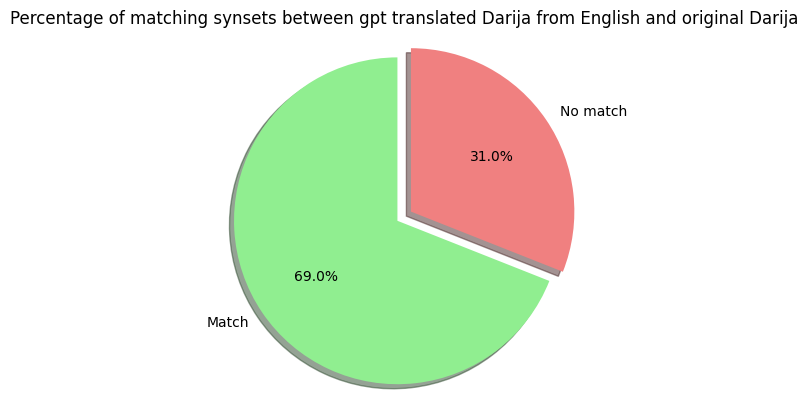

In [4]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('2word-constructions.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "كنت عارفها!"},
            {"role": "assistant", "content": "I knew it!"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()

4

0                                   Give me that bag.
1                             Next week, on Thursday.
2                He wants to start studying tomorrow!
3           How does your book help me to understand?
4          When we fly, they are afraid of airplanes.
                           ...                       
95           Go out, get some fresh air to cool down.
96    I know, otherwise they would have stayed there.
97                                    5 minutes, sir.
98            You don't need to carry it for me, sir.
99                   We never used to do the laundry.
Name: transl, Length: 100, dtype: object


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, 'Give me that bag.', 'hand me that bag.', 0.9780573844909668, True), (3, 'Next week, on Thursday.', 'Next week, on Thursday', 0.9954919219017029, True), (4, 'He wants to start studying tomorrow!', 'so start studying soon!', 0.7864850759506226, True), (5, 'How does your book help me to understand?', 'how is your book going to help me calm down', 0.7888840436935425, True), (6, 'When we fly, they are afraid of airplanes.', "we're both scared of flying", 0.8321271538734436, True), (7, 'This thing belongs to your girlfriend', "it's all your fault", 0.2504068613052368, False), (8, 'He will visit us next week.', 'she is getting married next week.', 0.8446152806282043, True), (9, 'The tall ones have their own nature.', 'long ones of course', 0.5942057967185974, False), (10, 'Donate to me with your head!', 'enjoy!', 0.4547730088233948, False), (11, 'I was going to suggest this to them.', 'I was going to suggest that too', 0.943203866481781, True), (12, 'Let me tell you something', 'let me 

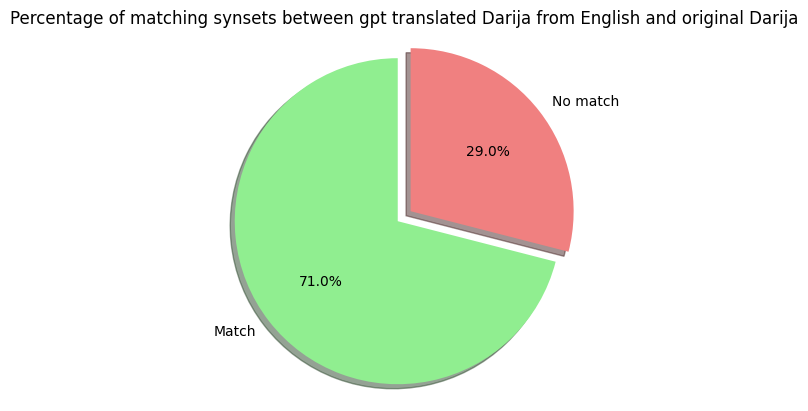

In [5]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('4word-constructions.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "أرا ليا داك ساك"},
            {"role": "assistant", "content": "hand me that bag"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()

5

0                  They are hiding something, I'm sure!
1           It seems like they are trying to stay cool.
2                  The exams seem to be very difficult.
3                 They will keep bothering him at work!
4              I always knew that she wanted us to die.
                            ...                        
95    I'll be here, and if there's anything you need...
96    I want to know if you know a good kitchen, oth...
97    This is the first time we have worked with thi...
98    I don't know how much longer I have until I fi...
99    Please don't forget to clean up your room befo...
Name: transl, Length: 100, dtype: object


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, "They are hiding something, I'm sure!", "They're hiding something, I'm sure!", 0.9954628944396973, True), (3, 'It seems like they are trying to stay cool.', "It's obvious they're trying to keep their cool.", 0.9122123718261719, True), (4, 'The exams seem to be very difficult.', "the hotels don't seem very comfortable.", 0.7411746978759766, True), (5, 'They will keep bothering him at work!', 'he is probably about to be laid off by head office!', 0.543610155582428, False), (6, 'I always knew that she wanted us to die.', 'I always knew she wanted us dead', 0.9428467154502869, True), (7, 'I want to know how much time I have left to study.', "I'd like to know how much time I have left to study", 0.9804149866104126, True), (8, 'We will have exams, is that what you meant?', 'We will have an exam, if that is what you mean', 0.9216700792312622, True), (9, 'I will cover the remaining subjects by next Tuesday.', 'We will cover all the material up to next Tuesday', 0.8980250358581543, True), 

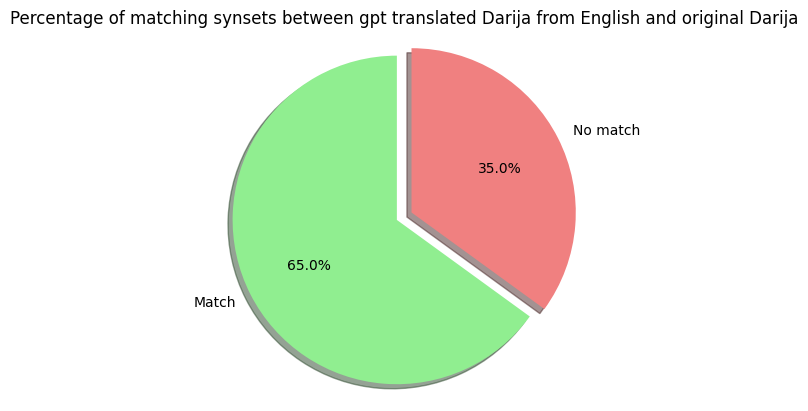

In [6]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('5word-constructions.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "بغيت نعرف شحال بقا ليا تلوقت باش نقرا"},
            {"role": "assistant", "content": "I'd like to know how much time I have left to study"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()